# ch 5. word cloud

이전 챕터에서 2022년 한국 야구 데이터 셋을 토큰화 했습니다. 이번 챕터에서는 가장 기본적인 자연어 데이터 시각화 기법인 워드 클라우드에 대해서 알아보겠습니다. 워드 클라우드는 특정 단어와 함께 등장한 단어의 빈도 수를 집계해서, 어떤 단어가 연관되어 있는지를 시각적으로 표현하는 기법입니다.

In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 667.8 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.7 MB/s eta 0:00:00


## 선수 이름 데이터 준비
우리가 만들어보고 싶은 건 특정 선수 이름이 주어지면, 그 선수와 함께 언급되는 단어들을 시각적으로 보여주는 것입니다. 이를 위해서 먼저 토큰화 한 뉴스 기사 데이터에서 특정 선수가 언급되면, 함께 언급된 단어들의 빈도수를 세어 딕셔너리 형태로 만들어보겠습니다. 

먼저 기사에 선수 이름이 포함되었는지 여부를 판단하기 위해 크롤러 시간에 짰던 코드를 재사용합니다.

In [3]:
import csv

players = []
with open("./data/baseball_players.csv", encoding="utf-8") as fr:
    reader = csv.reader(fr)
    result = next(reader)
    for row in reader:
        team, pitchers, catchers, infielders, outfielders = row
        pitchers = pitchers.split("\n")
        catchers = catchers.split("\n")
        infielders = infielders.split("\n")
        outfielders = outfielders.split("\n")
        players.extend(pitchers + catchers + infielders + outfielders)

In [4]:
players_set = set(players)

In [5]:
print(players_set)

{'후라도', '벤자민', '김민석', '박건우', '이지영', '강백호', '김기중', '최이준', '신헌민', '렉스', '한승택', '신민재', '박찬호', '김명신', '양의지', '강진성', '서건창', '서진용', '김진욱', '박해민', '정훈', '오선진', '문현빈', '이상민', '김정민', '정철원', '김민', '고봉재', '김선빈', '고종욱', '안권수', '전의산', '한승주', '수아레즈', '문승원', '조민석', '김한별', '정찬헌', '박세진', '에레디아', '김건웅', '강승호', '이성규', '송찬의', '박승욱', '정수빈', '최원준', '이학주', '최지강', '이준영', '앤더슨', '김대유', '이성곤', '메디나', '김성윤', '박상언', '임정호', '문보경', '이지강', '최원태', '김민식', '고영표', '김민우', '김광현', '윤정현', '김진성', '김혜성', '로하스', '오영수', '박민호', '임창민', '송명기', '박세혁', '이병규', '문상준', '슐서', '윤대경', '김대우', '최승용', '박성한', '안치홍', '김영규', '변우혁', '강민호', '알포드', '이선우', '김시훈', '장현식', '오태곤', '김태연', '반즈', '윤명준', '김진호', '김성현', '이의리', '최준용', '최민준', '김재웅', '구창모', '홍창기', '전병우', '노시환', '박동원', '이재현', '엄상백', '강재민', '유로결', '조용호', '원태인', '정우람', '신정락', '피렐라', '조형우', '노진혁', '장성우', '장진혁', '구자욱', '김준완', '강민성', '이원석', '안우진', '황재균', '임병욱', '양석환', '임준섭', '맥카티', '서호철', '김동혁', '남지민', '김휘집', '김성욱', '나균안', '진해수', '이창진', '함덕주', '도태훈', '윤정빈', '최재훈', '김유성', '윤동희', '박경수', '이준호', '주효상', '

## 기사 토큰화 환 데이터 셋 준비

토큰화한 데이터 셋을 순회하며 특정 기사에 선수 이름이 포함되어 있을 경우, 함께 언급된 일반 명사, 고유 명사의 빈도수를 세어서 딕셔너리에 추가합니다.

In [34]:
import pandas as pd

df= pd.read_csv("./data/sampled_baseball_nouns.tsv", encoding="utf-8", sep="\t")
dff= pd.read_csv("./data/baseball_nouns.tsv", encoding="utf-8", sep="\t")

In [35]:
df

,nouns
0,"['고영표', '대패', '탈락', '위기', '고영표', '부진', '위즈', '..."
1,"['롯데', '여름', '방학', '시리즈', '사진', '제공', '롯데', '자..."
2,"['키움', '이정후', '아버지', '이종범', '최소', '경기', '안타', ..."
3,"['잠실구장', '외국인', '선수', '부진', '프로', '야구', 'LG', ..."
4,"['롯데', '자이언츠', '경기', '라인업', '제출', '명단', '수정', ..."
...,...
9995,"['한화', 'KT', '8월 5일']"
9996,"['컨디션', 'KIA', '투수', '양현종', '안우진', '차례', '뒤', ..."
9997,"['김혜성', '덕분', '가을', '야구', '홍원기', '감독', '지휘', '..."
9998,"['후반기', '도약', '열쇠', '외국인', '타자', '잭', '렉스', '미..."


In [36]:
df.info()  # object : 리스트 형태가 아니라 문자열 형태인 거!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nouns   10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [60]:
#eval(df.iloc[0]["nouns"])   # 문자열 전달 받아서 파이썬 코드로 인식 -> eval 이용해서 리스트로 리턴받음

In [59]:
#eval(dff.iloc[0]["nouns"]) 

In [10]:
eval("4+5")

9

In [38]:
from tqdm import tqdm

tqdm.pandas()
df["nouns"] = df["nouns"].progress_apply(lambda x: eval(x))

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3382.94it/s]


In [43]:
dff["nouns"] = dff["nouns"].progress_apply(lambda x: eval(x))

100%|████████████████████████████████████████████████████████████████████████| 102482/102482 [00:31<00:00, 3270.38it/s]


### 동시 출현 빈도 집계
특정 선수의 이름과 함께 등장한 명사를 defaultdict와 Counter를 이용해서 집계합니다.

In [39]:
from collections import Counter, defaultdict
from tqdm import tqdm

# key: 각각의 단어
# value: 함께 등장한 단어 횟수 Counter
word_count_dict = defaultdict(Counter)

In [77]:
def count_words(nouns):
    # 기사에 등장한 선수 이름
    # 전체 선수 이름 중에서 기사에 포함된 선수 이름만 가져옴
    players_names = set(nouns).intersection(players_set)
    for player_name in players_names:
        c = Counter([x for x in nouns if x != player_name])
        word_count_dict[player_name] += c
    # print(players_names)

In [52]:
count_words(df.iloc[0].nouns)

In [56]:
tqdm.pandas()
df["nouns"].progress_apply(lambda x:count_words(x))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:11<00:00, 889.88it/s]


0       None
1       None
2       None
3       None
4       None
        ... 
9995    None
9996    None
9997    None
9998    None
9999    None
Name: nouns, Length: 10000, dtype: object

In [65]:
# word_count_dict["이정후"]

In [78]:
count_words(dff.iloc[0].nouns)

In [64]:
tqdm.pandas()
dff["nouns"].progress_apply(lambda x:count_words(x))

100%|█████████████████████████████████████████████████████████████████████████| 102482/102482 [05:37<00:00, 303.41it/s]


0         None
1         None
2         None
3         None
4         None
          ... 
102477    None
102478    None
102479    None
102480    None
102481    None
Name: nouns, Length: 102482, dtype: object

In [79]:
word_count_dict["이정후"].most_common(10)

[('키움', 48819),
 ('경기', 37203),
 ('안타', 35232),
 ('시즌', 34703),
 ('홈런', 24428),
 ('선수', 21464),
 ('타자', 20816),
 ('팀', 19365),
 ('SSG', 17918),
 ('기록', 17563)]

## word cloud 시각화

함께 등장하는 단어를 세었으니 이제 워드 클라우드를 만들어보겠습니다. 폰트 적용 부분은 아래 가이드를 읽어보고, 본인의 환경에 맞게 코드를 수정하면 됩니다.

- [윈도우 폰트 적용 가이드](https://doitgrow.com/34#:~:text=%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C%EC%97%90%20%EC%82%AC%EC%9A%A9%ED%95%A0%20%ED%8F%B0%ED%8A%B8,%EA%B2%B0%EA%B3%BC%EB%A5%BC%20%ED%99%95%EC%9D%B8%ED%95%A0%20%EC%88%98%20%EC%9E%88%EC%8A%B5%EB%8B%88%EB%8B%A4.)
- [맥 폰트 적용 가이드](https://business-analytics.tistory.com/3)

In [69]:
from wordcloud import WordCloud

In [90]:
from matplotlib import pyplot as plt

target= "이정후"
def visualize_wordcloud(target, color):
    wordcloud = WordCloud(
        font_path= "C:\Windows\Fonts\H2GTRE.TTF",
        width=1000,
        height=400,
        scale=2.0,
        background_color = "white",
        colormap= color
    ).generate_from_frequencies(word_count_dict[target])
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)

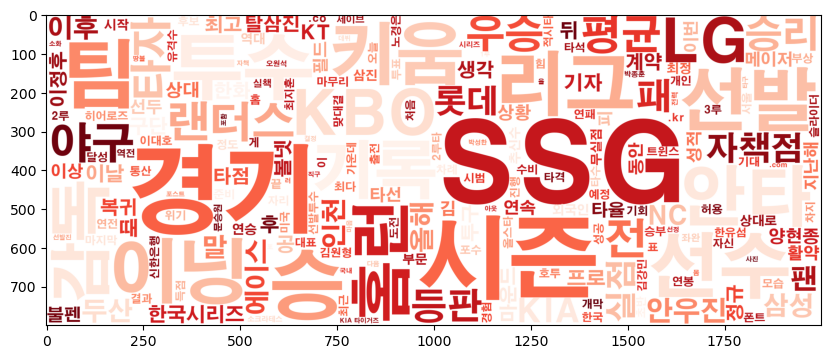

In [91]:
visualize_wordcloud("김광현", "Reds")

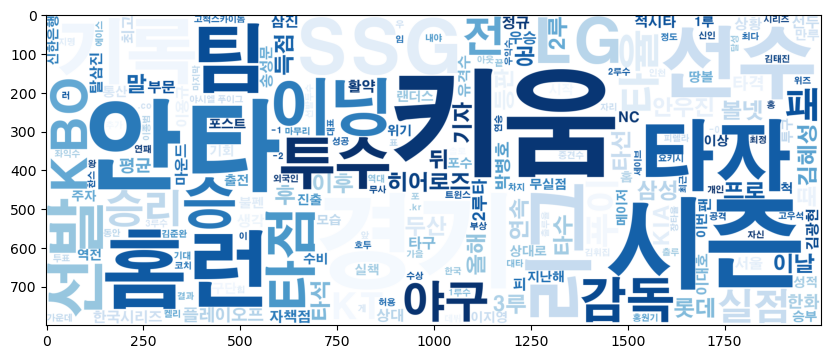

In [92]:
visualize_wordcloud("이정후", "Blues")

## 정리
이번 챕터에서는 자연어 데이터 시각화 하면 가장 먼저 떠오르는 워드 클라우드를 만들어 보았습니다. 사실 워드 클라우드는 직관적으로 의미를 전달하는 것이 어려워서 잘 사용되지 않습니다. 이어지는 챕터들에서 더 정교화 된 자연어처리 알고리즘들을 배워보겠습니다.